In [13]:
pip install numpy pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install librosa soundfile scipy


Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install tensorflow keras


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install torch torchvision torchaudio


   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.6 MB 882.6 kB/s eta 0:00:02
   ------------------- -------------------- 0.8/1.6 MB 882.6 kB/s eta 0:00:01
   ------------------- -------------------- 0.8/1.6 MB 882.6 kB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.6 MB 968.5 kB/s eta 0:00:01
   -------------------------------- ------- 1.3/1.6 MB 860.2 kB/s eta 0:00:01
   -------------------------------- ------- 1.3/1.6 MB 860.2 kB/s eta 0:00:01
   ---------------------------------------  1.6/1.6 MB 822.3 kB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 816.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/241.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/241.3 MB ? eta -:--:--
   ------------------------

In [11]:
pip install tqdm


Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install kaggle gdown


Note: you may need to restart the kernel to use updated packages.


Speech Emotion Recognition System

Generating synthetic data for demonstration...
Training set: (600, 145)
Validation set: (200, 145)
Test set: (200, 145)

Training MLP model...

Training MLP model...
Training samples: 600
Validation samples: 200
Number of classes: 5
Classes: ['angry' 'fearful' 'happy' 'neutral' 'sad']
Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.2090 - loss: 2.1682 - val_accuracy: 0.2000 - val_loss: 1.6376 - learning_rate: 0.0010
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2356 - loss: 1.9696 - val_accuracy: 0.1950 - val_loss: 1.6362 - learning_rate: 0.0010
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2382 - loss: 1.8132 - val_accuracy: 0.2050 - val_loss: 1.6317 - learning_rate: 0.0010
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2241 - loss: 1.8241 - val_accuracy: 0.2050 - val_loss: 1.6333 - learning_rate: 0.0010
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2972 - lo

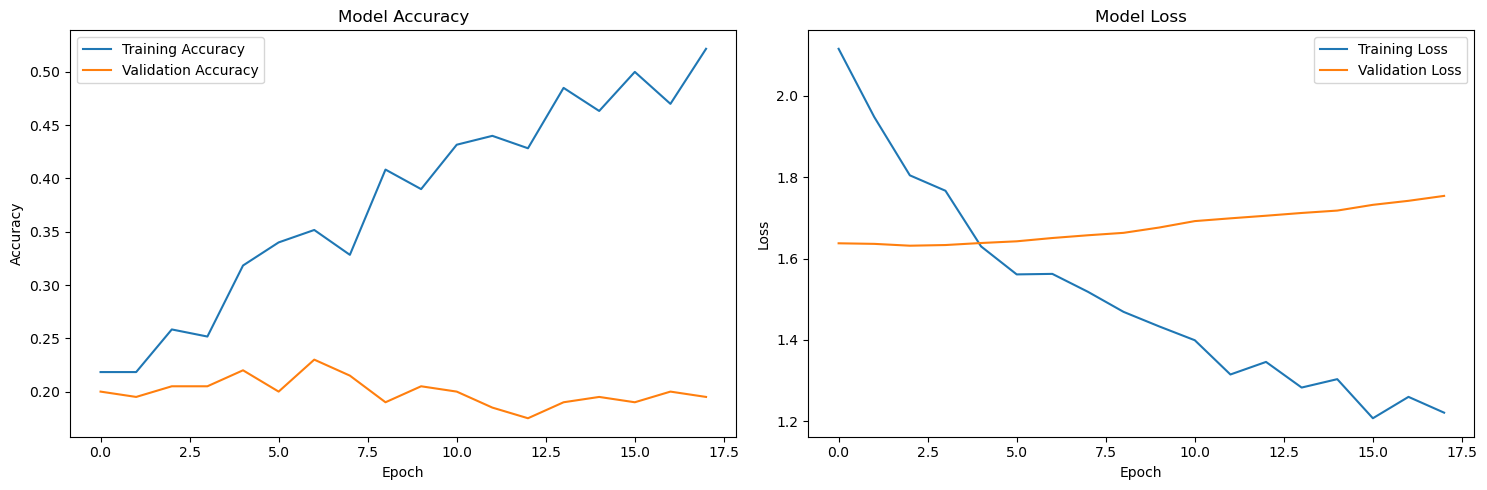

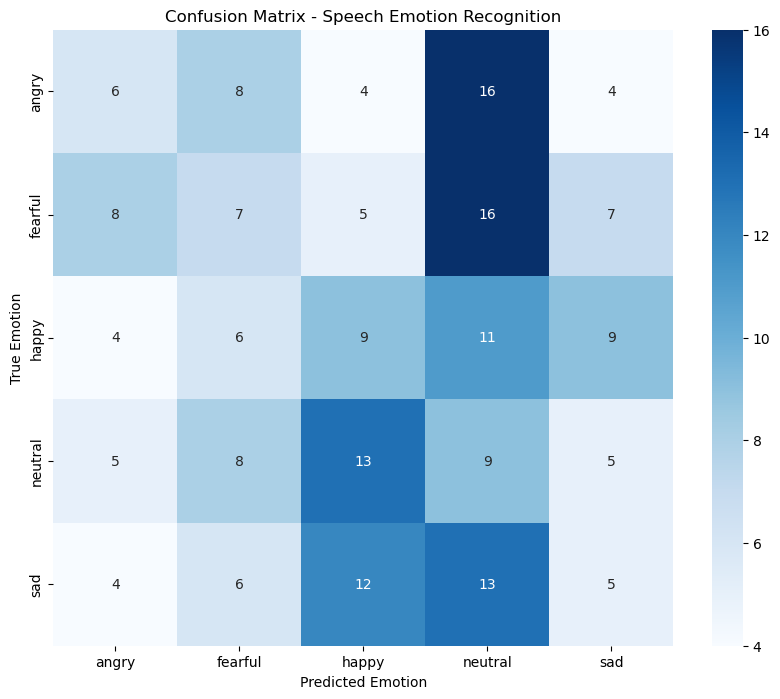


REAL DATASET USAGE INSTRUCTIONS:
1. Download RAVDESS dataset from: https://zenodo.org/record/1188976
2. Extract to a folder and update the dataset_path
3. Use the following code:

    # Load RAVDESS dataset
    dataset_path = '/path/to/ravdess/dataset'
    X, y, emotion_map = ser.load_ravdess_dataset(dataset_path)
    
    # Split data
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.4, random_state=42, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )
    
    # Train model
    history = ser.train_model(X_train, y_train, X_val, y_val, model_type='mlp', epochs=100)
    
    # Evaluate
    accuracy, y_pred, y_pred_probs = ser.evaluate_model(X_test, y_test)
    
    # Predict on new audio
    emotion = ser.predict_emotion('/path/to/new/audio.wav')
    print(f"Predicted emotion: {emotion}")
    

4. For sequential models (CNN/LSTM), extract sequence features

In [14]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Input, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import glob
import warnings
warnings.filterwarnings('ignore')

class SpeechEmotionRecognizer:
    def __init__(self, sample_rate=22050, n_mfcc=13, n_mels=128):
        """
        Initialize the Speech Emotion Recognition system
        
        Parameters:
        - sample_rate: Audio sample rate for processing
        - n_mfcc: Number of MFCC features to extract
        - n_mels: Number of Mel filter banks
        """
        self.sample_rate = sample_rate
        self.n_mfcc = n_mfcc
        self.n_mels = n_mels
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()
        self.model = None
        self.feature_dim = None
        
    def extract_features(self, audio_path, max_len=None):
        """
        Extract comprehensive audio features including MFCC, spectral, and rhythm features
        
        Parameters:
        - audio_path: Path to audio file
        - max_len: Maximum length for padding/truncating features
        
        Returns:
        - Combined feature vector
        """
        try:
            
            audio, sr = librosa.load(audio_path, sr=self.sample_rate, duration=3.0)
            
    
            mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=self.n_mfcc)
            mfccs_scaled = np.mean(mfccs.T, axis=0)
            
            
            spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sr))
            spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sr))
            spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sr))
            zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(audio))
            
            
            chroma = np.mean(librosa.feature.chroma_stft(y=audio, sr=sr))
            mel_spectrogram = np.mean(librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=self.n_mels))
            
            # Extract rhythm features
            tempo, _ = librosa.beat.beat_track(y=audio, sr=sr)
            
            # Combine all features
            features = np.hstack([
                mfccs_scaled,
                spectral_centroid,
                spectral_rolloff,
                spectral_bandwidth,
                zero_crossing_rate,
                chroma,
                mel_spectrogram,
                tempo
            ])
            
            return features
            
        except Exception as e:
            print(f"Error extracting features from {audio_path}: {e}")
            return None
    
    def extract_sequence_features(self, audio_path, max_len=100):
        """
        Extract sequential features for RNN/LSTM models
        
        Parameters:
        - audio_path: Path to audio file
        - max_len: Maximum sequence length
        
        Returns:
        - Sequential feature matrix
        """
        try:
            # Load audio file
            audio, sr = librosa.load(audio_path, sr=self.sample_rate, duration=3.0)
            
            mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=self.n_mfcc)
            
            # Transpose to get time steps as first dimension
            mfccs = mfccs.T
            
            # Pad or truncate to fixed length
            if len(mfccs) > max_len:
                mfccs = mfccs[:max_len]
            else:
                pad_width = max_len - len(mfccs)
                mfccs = np.pad(mfccs, ((0, pad_width), (0, 0)), mode='constant')
                
            return mfccs
            
        except Exception as e:
            print(f"Error extracting sequence features from {audio_path}: {e}")
            return None
    
    def load_ravdess_dataset(self, dataset_path):
        """
        Load and process RAVDESS dataset
        
        RAVDESS filename format: Modality-VocalChannel-Emotion-Intensity-Statement-Repetition-Actor
        Emotions: 01-neutral, 02-calm, 03-happy, 04-sad, 05-angry, 06-fearful, 07-disgust, 08-surprised
        
        Parameters:
        - dataset_path: Path to RAVDESS dataset directory
        
        Returns:
        - features, labels, emotion_map
        """
        emotion_map = {
            '01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad',
            '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'
        }
        
        features = []
        labels = []
        
        audio_files = glob.glob(os.path.join(dataset_path, "**/*.wav"), recursive=True)
        
        print(f"Processing {len(audio_files)} audio files...")
        
        for i, file_path in enumerate(audio_files):
            if i % 100 == 0:
                print(f"Processed {i}/{len(audio_files)} files")
                
            # Extract emotion from filename
            filename = os.path.basename(file_path)
            emotion_code = filename.split('-')[2]
            
            if emotion_code in emotion_map:
                # Extract features
                feature_vector = self.extract_features(file_path)
                
                if feature_vector is not None:
                    features.append(feature_vector)
                    labels.append(emotion_map[emotion_code])
        
        return np.array(features), np.array(labels), emotion_map
    
    def load_custom_dataset(self, dataset_path, emotion_folders):
        """
        Load custom dataset organized in emotion folders
        
        Parameters:
        - dataset_path: Path to dataset directory
        - emotion_folders: List of emotion folder names
        
        Returns:
        - features, labels
        """
        features = []
        labels = []
        
        for emotion in emotion_folders:
            emotion_path = os.path.join(dataset_path, emotion)
            audio_files = glob.glob(os.path.join(emotion_path, "*.wav"))
            
            print(f"Processing {len(audio_files)} files for emotion: {emotion}")
            
            for file_path in audio_files:
                feature_vector = self.extract_features(file_path)
                
                if feature_vector is not None:
                    features.append(feature_vector)
                    labels.append(emotion)
        
        return np.array(features), np.array(labels)
    
    def build_mlp_model(self, input_dim, num_classes):
        """
        Build Multi-Layer Perceptron model for emotion recognition
        
        Parameters:
        - input_dim: Input feature dimension
        - num_classes: Number of emotion classes
        
        Returns:
        - Compiled Keras model
        """
        model = Sequential([
            Dense(256, activation='relu', input_shape=(input_dim,)),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(128, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(32, activation='relu'),
            Dropout(0.2),
            
            Dense(num_classes, activation='softmax')
        ])
        
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        
        return model
    
    def build_cnn_model(self, input_shape, num_classes):
        """
        Build 1D CNN model for sequential emotion recognition
        
        Parameters:
        - input_shape: Input sequence shape (time_steps, features)
        - num_classes: Number of emotion classes
        
        Returns:
        - Compiled Keras model
        """
        model = Sequential([
            Conv1D(64, 5, activation='relu', input_shape=input_shape),
            BatchNormalization(),
            MaxPooling1D(2),
            Dropout(0.3),
            
            Conv1D(128, 5, activation='relu'),
            BatchNormalization(),
            MaxPooling1D(2),
            Dropout(0.3),
            
            Conv1D(256, 3, activation='relu'),
            BatchNormalization(),
            MaxPooling1D(2),
            Dropout(0.3),
            
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.4),
            Dense(num_classes, activation='softmax')
        ])
        
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        
        return model
    
    def build_lstm_model(self, input_shape, num_classes):
        """
        Build LSTM model for sequential emotion recognition
        
        Parameters:
        - input_shape: Input sequence shape (time_steps, features)
        - num_classes: Number of emotion classes
        
        Returns:
        - Compiled Keras model
        """
        model = Sequential([
            Bidirectional(LSTM(128, return_sequences=True), input_shape=input_shape),
            BatchNormalization(),
            Dropout(0.3),
            
            Bidirectional(LSTM(64, return_sequences=False)),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(128, activation='relu'),
            Dropout(0.4),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(num_classes, activation='softmax')
        ])
        
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        
        return model
    
    def train_model(self, X_train, y_train, X_val, y_val, model_type='mlp', epochs=100, batch_size=32):
        """
        Train the emotion recognition model
        
        Parameters:
        - X_train, y_train: Training data
        - X_val, y_val: Validation data
        - model_type: Type of model ('mlp', 'cnn', 'lstm')
        - epochs: Number of training epochs
        - batch_size: Training batch size
        
        Returns:
        - Training history
        """
        # Encode labels
        y_train_encoded = self.label_encoder.fit_transform(y_train)
        y_val_encoded = self.label_encoder.transform(y_val)
        
        num_classes = len(self.label_encoder.classes_)
        
        # Build model based on type
        if model_type == 'mlp':
            # Scale features for MLP
            X_train_scaled = self.scaler.fit_transform(X_train)
            X_val_scaled = self.scaler.transform(X_val)
            
            self.feature_dim = X_train_scaled.shape[1]
            self.model = self.build_mlp_model(self.feature_dim, num_classes)
            X_train_final = X_train_scaled
            X_val_final = X_val_scaled
            
        elif model_type == 'cnn':
            input_shape = (X_train.shape[1], X_train.shape[2])
            self.model = self.build_cnn_model(input_shape, num_classes)
            X_train_final = X_train
            X_val_final = X_val
            
        elif model_type == 'lstm':
            input_shape = (X_train.shape[1], X_train.shape[2])
            self.model = self.build_lstm_model(input_shape, num_classes)
            X_train_final = X_train
            X_val_final = X_val
        
        # Define callbacks
        callbacks = [
            EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=1e-7)
        ]
        
        # Train model
        print(f"\nTraining {model_type.upper()} model...")
        print(f"Training samples: {len(X_train_final)}")
        print(f"Validation samples: {len(X_val_final)}")
        print(f"Number of classes: {num_classes}")
        print(f"Classes: {self.label_encoder.classes_}")
        
        history = self.model.fit(
            X_train_final, y_train_encoded,
            validation_data=(X_val_final, y_val_encoded),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=callbacks,
            verbose=1
        )
        
        return history
    
    def evaluate_model(self, X_test, y_test):
        """
        Evaluate the trained model
        
        Parameters:
        - X_test, y_test: Test data
        
        Returns:
        - Evaluation metrics
        """
        if self.model is None:
            raise ValueError("Model not trained yet. Call train_model() first.")
        
        # Prepare test data
        y_test_encoded = self.label_encoder.transform(y_test)
        
        if hasattr(self, 'scaler') and self.scaler is not None:
            X_test_scaled = self.scaler.transform(X_test)
            X_test_final = X_test_scaled
        else:
            X_test_final = X_test
        
        # Make predictions
        y_pred_probs = self.model.predict(X_test_final)
        y_pred = np.argmax(y_pred_probs, axis=1)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test_encoded, y_pred)
        
        print(f"\nTest Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test_encoded, y_pred, target_names=self.label_encoder.classes_))
        
        return accuracy, y_pred, y_pred_probs
    
    def plot_confusion_matrix(self, y_true, y_pred):
        """
        Plot confusion matrix
        """
        cm = confusion_matrix(y_true, y_pred)
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=self.label_encoder.classes_,yticklabels=self.label_encoder.classes_)
        plt.title('Confusion Matrix - Speech Emotion Recognition')
        plt.ylabel('True Emotion')
        plt.xlabel('Predicted Emotion')
        plt.show()
    
    def plot_training_history(self, history):
        """
        Plot training history
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Plot accuracy
        ax1.plot(history.history['accuracy'], label='Training Accuracy')
        ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
        ax1.set_title('Model Accuracy')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Accuracy')
        ax1.legend()
        
        # Plot loss
        ax2.plot(history.history['loss'], label='Training Loss')
        ax2.plot(history.history['val_loss'], label='Validation Loss')
        ax2.set_title('Model Loss')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.legend()
        
        plt.tight_layout()
        plt.show()
    
    def predict_emotion(self, audio_path, return_probabilities=False):
        """
        Predict emotion from a single audio file
        
        Parameters:
        - audio_path: Path to audio file
        - return_probabilities: Whether to return class probabilities
        
        Returns:
        - Predicted emotion and optionally probabilities
        """
        if self.model is None:
            raise ValueError("Model not trained yet. Call train_model() first.")
        
        # Extract features
        if hasattr(self, 'scaler') and self.scaler is not None:
            # MLP model
            features = self.extract_features(audio_path)
            features = features.reshape(1, -1)
            features_scaled = self.scaler.transform(features)
            features_final = features_scaled
        else:
            # CNN/LSTM model
            features = self.extract_sequence_features(audio_path)
            features_final = features.reshape(1, features.shape[0], features.shape[1])
        
        # Make prediction
        prediction_probs = self.model.predict(features_final, verbose=0)
        predicted_class = np.argmax(prediction_probs, axis=1)[0]
        predicted_emotion = self.label_encoder.inverse_transform([predicted_class])[0]
        
        if return_probabilities:
            prob_dict = {emotion: prob for emotion, prob in 
                        zip(self.label_encoder.classes_, prediction_probs[0])}
            return predicted_emotion, prob_dict
        else:
            return predicted_emotion

# Example usage and demonstration
def main():
    """
    Demonstration of the Speech Emotion Recognition system
    """
    print("Speech Emotion Recognition System")
    print("=" * 50)
    
    # Initialize the recognizer
    ser = SpeechEmotionRecognizer()
    
    # Example with synthetic data (replace with real dataset loading)
    print("\nGenerating synthetic data for demonstration...")
    
    # Generate synthetic feature data
    np.random.seed(42)
    n_samples = 1000
    n_features = 145  # Typical combined feature size
    
    # Create synthetic features
    X_synthetic = np.random.randn(n_samples, n_features)
    
    # Create synthetic labels
    emotions = ['happy', 'sad', 'angry', 'fearful', 'neutral']
    y_synthetic = np.random.choice(emotions, n_samples)
    
    # Split data
    X_train, X_temp, y_train, y_temp = train_test_split(
        X_synthetic, y_synthetic, test_size=0.4, random_state=42, stratify=y_synthetic
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )
    
    print(f"Training set: {X_train.shape}")
    print(f"Validation set: {X_val.shape}")
    print(f"Test set: {X_test.shape}")
    
    # Train MLP model
    print("\nTraining MLP model...")
    history = ser.train_model(X_train, y_train, X_val, y_val, model_type='mlp', epochs=50, batch_size=32)
    
    # Evaluate model
    print("\nEvaluating model...")
    accuracy, y_pred, y_pred_probs = ser.evaluate_model(X_test, y_test)
    
    # Plot results
    ser.plot_training_history(history)
    
    y_test_encoded = ser.label_encoder.transform(y_test)
    ser.plot_confusion_matrix(y_test_encoded, y_pred)
    
    print("\n" + "="*50)
    print("REAL DATASET USAGE INSTRUCTIONS:")
    print("="*50)
    print("1. Download RAVDESS dataset from: https://zenodo.org/record/1188976")
    print("2. Extract to a folder and update the dataset_path")
    print("3. Use the following code:")
    print("""
    # Load RAVDESS dataset
    dataset_path = '/path/to/ravdess/dataset'
    X, y, emotion_map = ser.load_ravdess_dataset(dataset_path)
    
    # Split data
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.4, random_state=42, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )
    
    # Train model
    history = ser.train_model(X_train, y_train, X_val, y_val, model_type='mlp', epochs=100)
    
    # Evaluate
    accuracy, y_pred, y_pred_probs = ser.evaluate_model(X_test, y_test)
    
    # Predict on new audio
    emotion = ser.predict_emotion('/path/to/new/audio.wav')
    print(f"Predicted emotion: {emotion}")
    """)
    
    print("\n4. For sequential models (CNN/LSTM), extract sequence features:")
    print("""
    # For CNN/LSTM models, load sequence features
    X_seq, y = load_sequence_features(dataset_path)
    
    # Train CNN model
    history = ser.train_model(X_train, y_train, X_val, y_val, model_type='cnn', epochs=100)
    
    # Train LSTM model
    history = ser.train_model(X_train, y_train, X_val, y_val, model_type='lstm', epochs=100)
    """)

if __name__ == "__main__":
    main()